In [63]:
#import data handling libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [64]:
#read in the main dataset
df = pd.read_csv('final_dataset_Nov_24.csv')

df

,ENT_SEM,GRAD_SEM,25,101,104,105,106,140,142,143,...,385,397,414,415,435,436,492,495,500,Y
0,20.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,19.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,19.6,3.4,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,14.6,4.8,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9706,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9707,13.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9708,14.6,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [65]:
courses = ['25',
 '101',
 '104',
 '105',
 '106',
 '140',
 '142',
 '143',
 '150',
 '151',
 '160',
 '165',
 '166',
 '181',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '492',
 '495',
 '500']

print('Overall grad rate:', df['Y'].mean())

features = courses + ['ENT_SEM']
random_states = np.random.randint(0, 10000, size=5).tolist()

print('Random states:', random_states)

splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[courses], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits.append((X_train, X_test, y_train, y_test))

Overall grad rate: 0.5038105046343976
Random states: [8614, 9108, 700, 5142, 4482]


In [66]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  67.160%
Best accuracy for split 1:  66.877%
Best accuracy for split 2:  66.851%
Best accuracy for split 3:  66.954%
Best accuracy for split 4:  67.327%


In [67]:
xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.671599,0.668383,0.690639,0.618609,0.652643
1,0.668766,0.679197,0.696133,0.644172,0.669145
2,0.668512,0.664264,0.682735,0.622699,0.651337
3,0.669544,0.683316,0.692471,0.667689,0.679854
4,0.673274,0.664779,0.671204,0.655419,0.663218


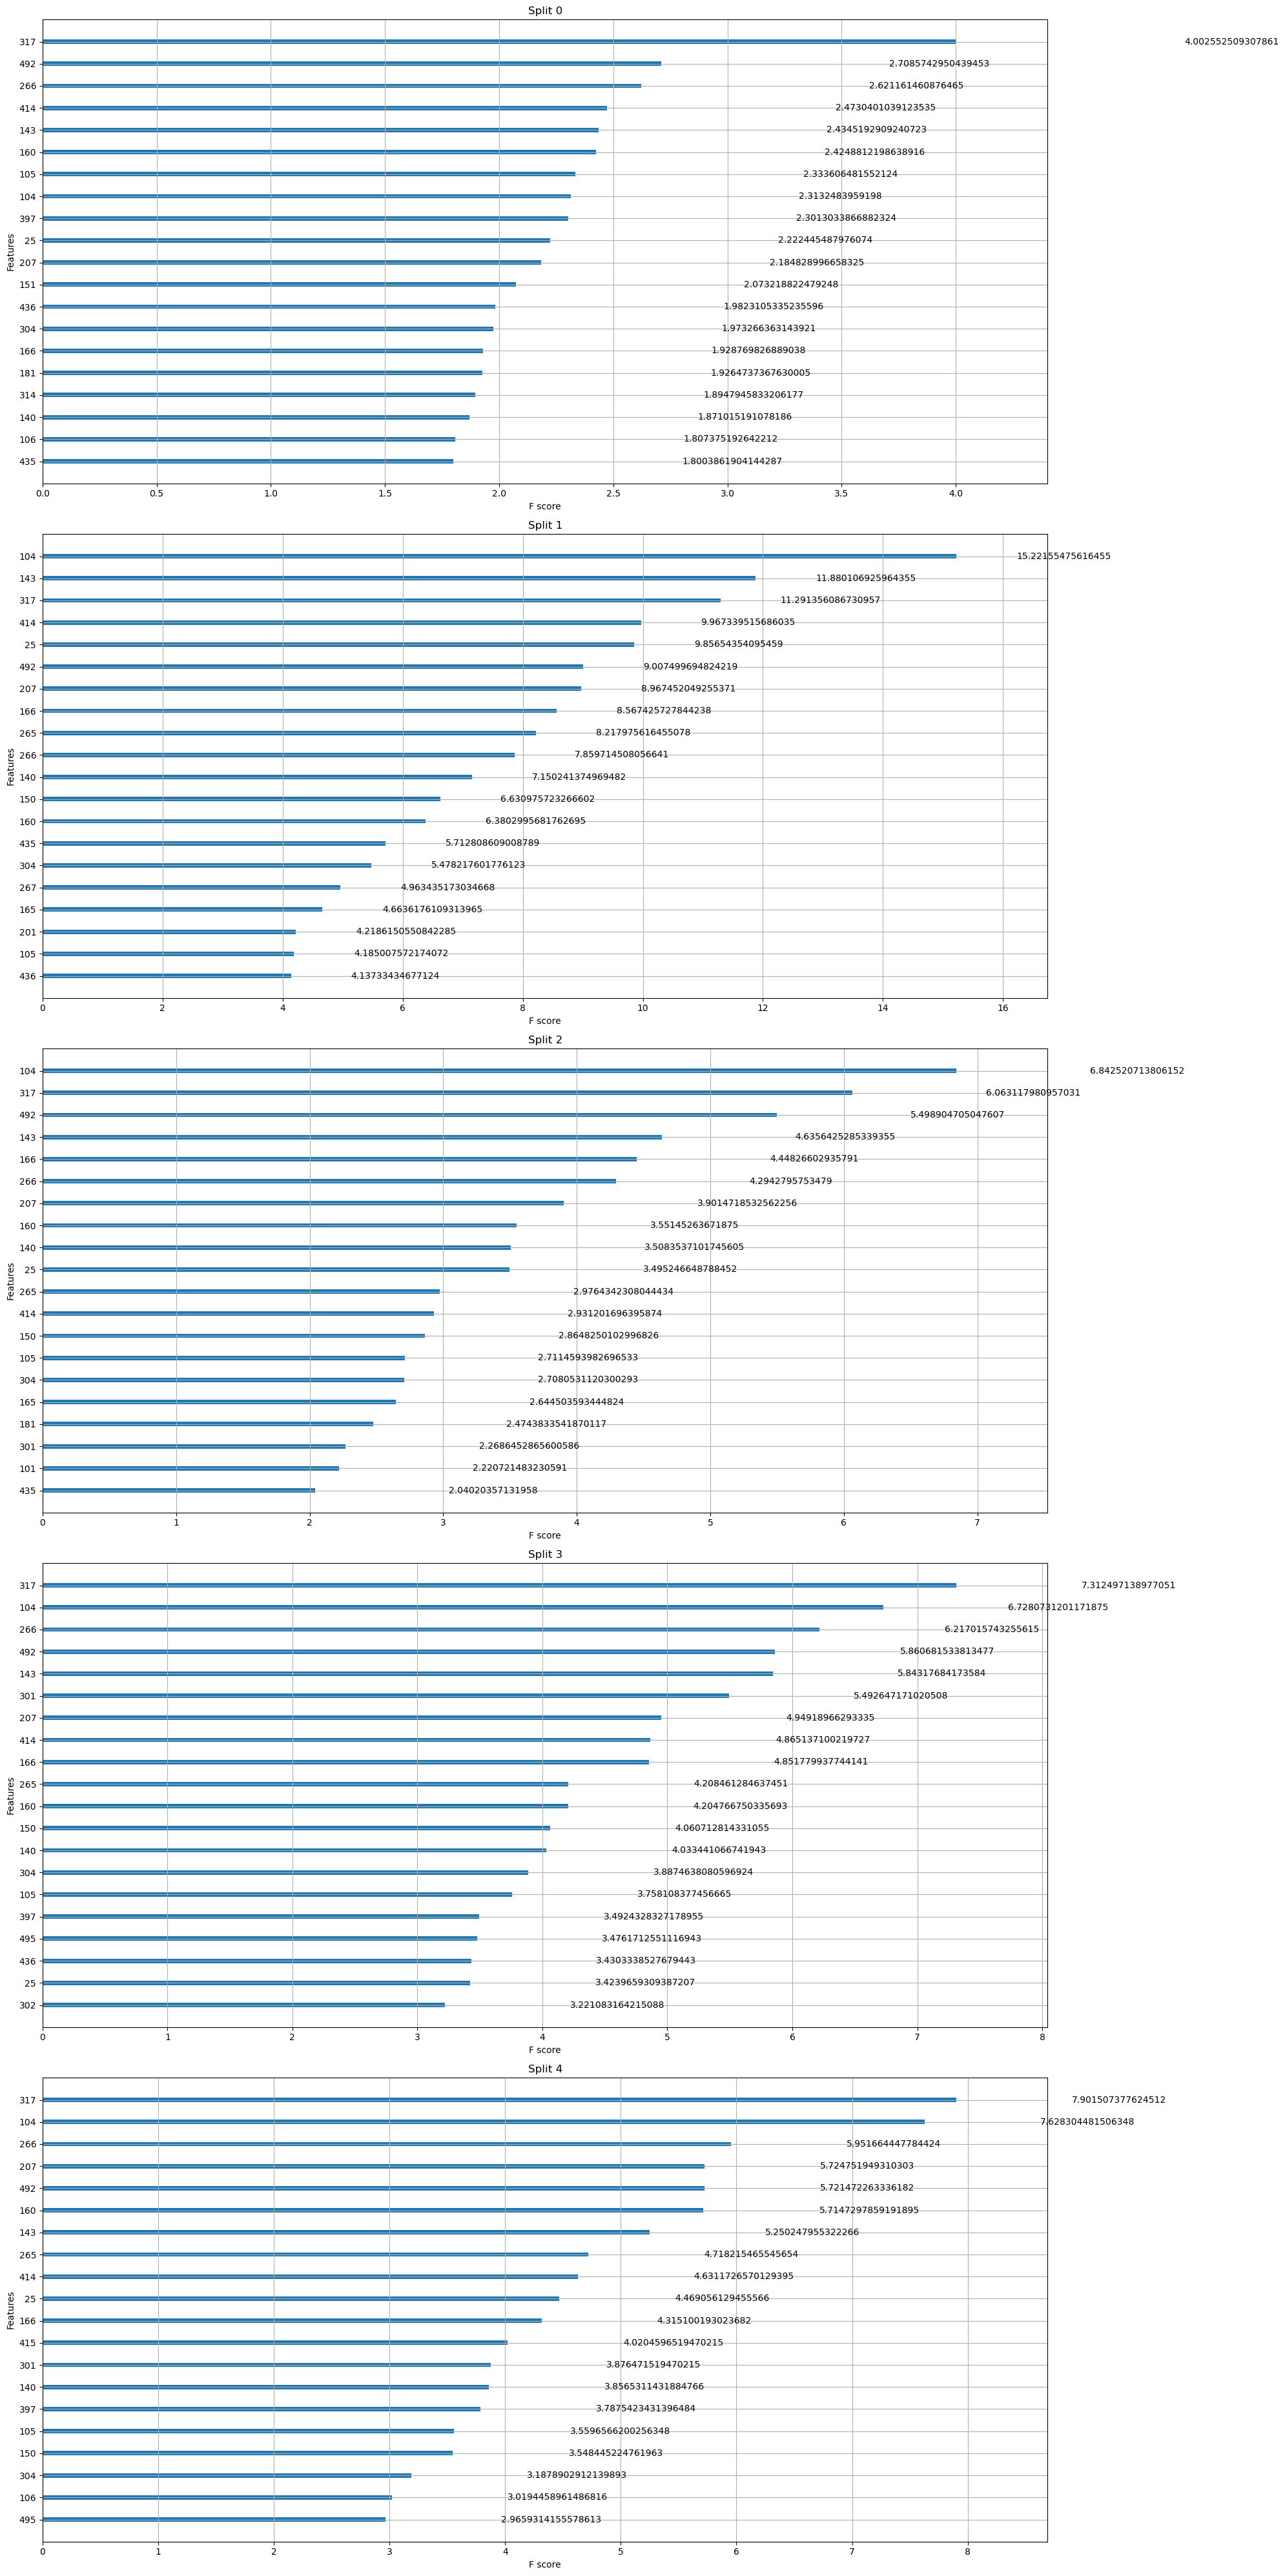

In [68]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(20, 40))

for i, search in enumerate(xgb_models):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='gain', 
                        max_num_features=20,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

In [70]:
df

,ENT_SEM,GRAD_SEM,25,101,104,105,106,140,142,143,...,385,397,414,415,435,436,492,495,500,Y
0,20.6,6.661338e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,19.6,6.661338e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,19.6,1.112256e-01,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.6,6.661338e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,18.4,-4.895482e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,14.6,-2.336149e-01,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9706,16.6,-7.444405e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9707,13.6,4.595323e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9708,14.6,-1.466035e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<Axes: xlabel='GRAD_SEM', ylabel='Count'>

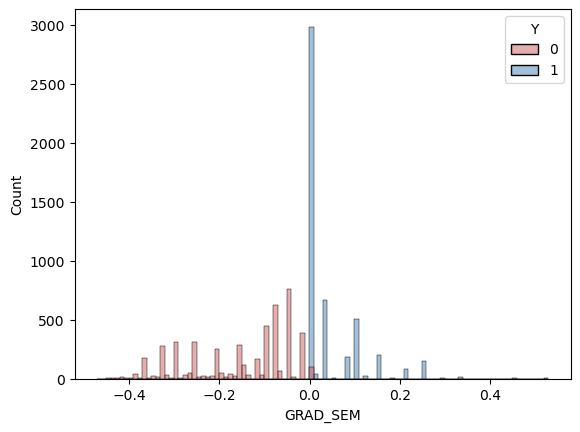

In [83]:
df = pd.read_csv('final_dataset_Nov_24.csv')
df.loc[df['GRAD_SEM'] == 0, 'GRAD_SEM'] = 24.6 - df['ENT_SEM']
df['GRAD_SEM'] = -np.log(df['GRAD_SEM']/3.8)
df['GRAD_SEM']/= (df['GRAD_SEM'].max() - df['GRAD_SEM'].min())

# Set the color palette
palette = {0: 'indianred', 1: 'steelblue'}

sns.histplot(data = df,
             x = 'GRAD_SEM', 
             hue = 'Y',
             palette = palette,
             bins = 100)

-MSE for split 0:  -0.015
-MSE for split 1:  -0.015
-MSE for split 2:  -0.015
-MSE for split 3:  -0.015
-MSE for split 4:  -0.015


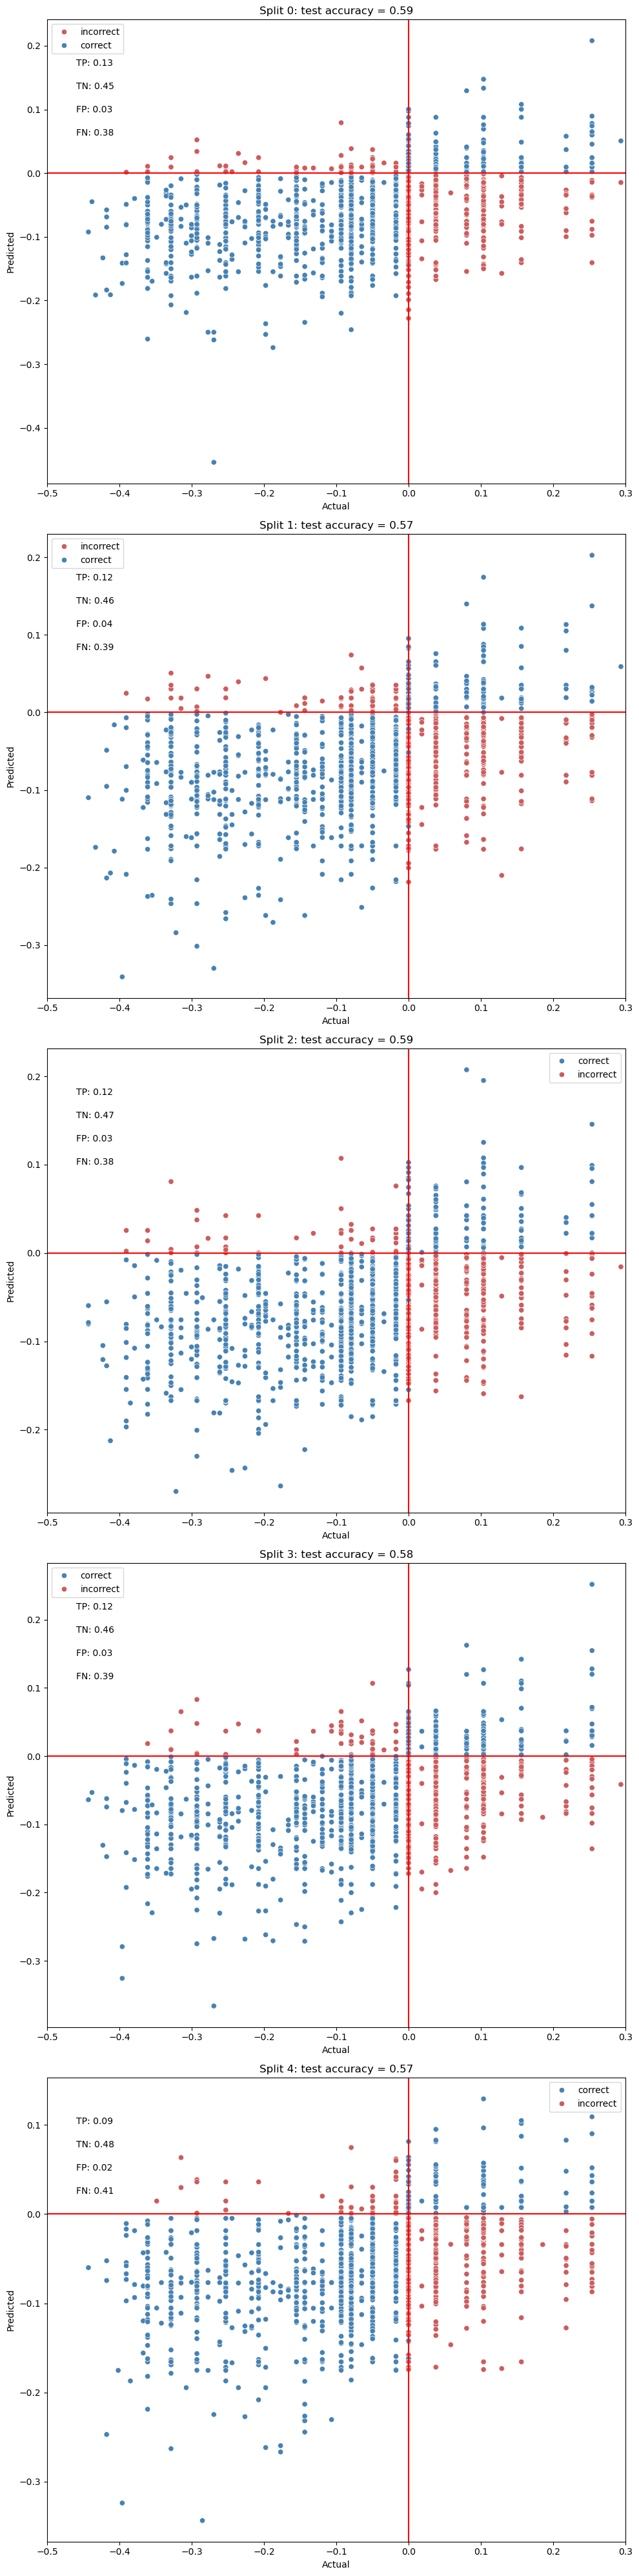

In [94]:
# from sklearn.metrics import make_scorer

# # Define the custom scoring function
# def custom_accuracy_scorer(y_true, y_pred):
#     # Convert regression predictions to binary classifications
#     y_pred_class = np.where(y_pred < 1, 0, 1)
#     y_true_class = np.where(y_true < 1, 0, 1)
#     # Calculate accuracy
#     return accuracy_score(y_true_class, y_pred_class)

# # Create a custom scorer using make_scorer
# custom_scorer = make_scorer(custom_accuracy_scorer, greater_is_better=True)

reg_splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[courses], 
                                                        df['GRAD_SEM'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True)
    # #apply standard scaling to the data
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.fit_transform(X_test)
    reg_splits.append((X_train, X_test, y_train, y_test))

xgb_reg_models = []
xgb_reg_df = pd.DataFrame(columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

#define the parameter grid for XGB Regressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse'],
}

#make a fig and ax with 5 subplots
fig, ax = plt.subplots(5, 1, figsize=(10, 40))
for i, (X_train, X_test, y_train, y_test) in enumerate(reg_splits):
    xgb_model = xgb.XGBRegressor()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='neg_mean_squared_error', 
                                       verbose=0, 
                                       random_state=random_states[i],
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_reg_models.append(random_search)
    # Make predictions using the best model
    y_pred = random_search.best_estimator_.predict(X_test)
    y_test_class = np.where(y_test < 0, 0, 1)
    y_pred_class = np.where(y_pred < 0, 0, 1)
    TP = np.sum((y_test_class == 1) & (y_pred_class == 1)) / len(y_test_class)
    TN = np.sum((y_test_class == 0) & (y_pred_class == 0)) / len(y_test_class)
    FP = np.sum((y_test_class == 0) & (y_pred_class == 1)) / len(y_test_class)
    FN = np.sum((y_test_class == 1) & (y_pred_class == 0)) / len(y_test_class)
    hue = np.where(y_test_class == y_pred_class, 'correct', 'incorrect')
    palette = {'correct': 'steelblue', 'incorrect': 'indianred'}
    # Evaluate the custom binary classifier
    xgb_reg_df.loc[i, 'test_accuracy'] = accuracy_score(y_test_class, y_pred_class)
    xgb_reg_df.loc[i, 'test_precision'] = precision_score(y_test_class, y_pred_class)
    xgb_reg_df.loc[i, 'test_recall'] = recall_score(y_test_class, y_pred_class)
    xgb_reg_df.loc[i, 'test_f1'] = f1_score(y_test_class, y_pred_class)
    print(f"-MSE for split {i}:  {random_search.best_score_:0.3f}")

    #on the i-th subplot, plot the predicted vs actual values. Draw a vertical line at 1.0
    sns.scatterplot(x=y_test, 
                    y=y_pred, 
                    hue=hue, 
                    ax=ax[i],
                    palette = palette)
    #display the test accuracy in the title of the plot
    ax[i].set_title(f'Split {i}: test accuracy = {xgb_reg_df.loc[i, "test_accuracy"]:.2f}')
    ax[i].set_xlabel('Actual')
    ax[i].set_xlim(-0.5,0.3)
    ax[i].set_ylabel('Predicted')
    ax[i].axvline(0, color='r')
    ax[i].axhline(0, color='r')
    #display the TP, TN, FP, FN inside the plot in the respective quadrants
    ax[i].text(0.05, 0.9, f'TP: {TP:.2f}', transform=ax[i].transAxes)
    ax[i].text(0.05, 0.85, f'TN: {TN:.2f}', transform=ax[i].transAxes)
    ax[i].text(0.05, 0.8, f'FP: {FP:.2f}', transform=ax[i].transAxes)
    ax[i].text(0.05, 0.75, f'FN: {FN:.2f}', transform=ax[i].transAxes)
    

plt.tight_layout()
plt.show()

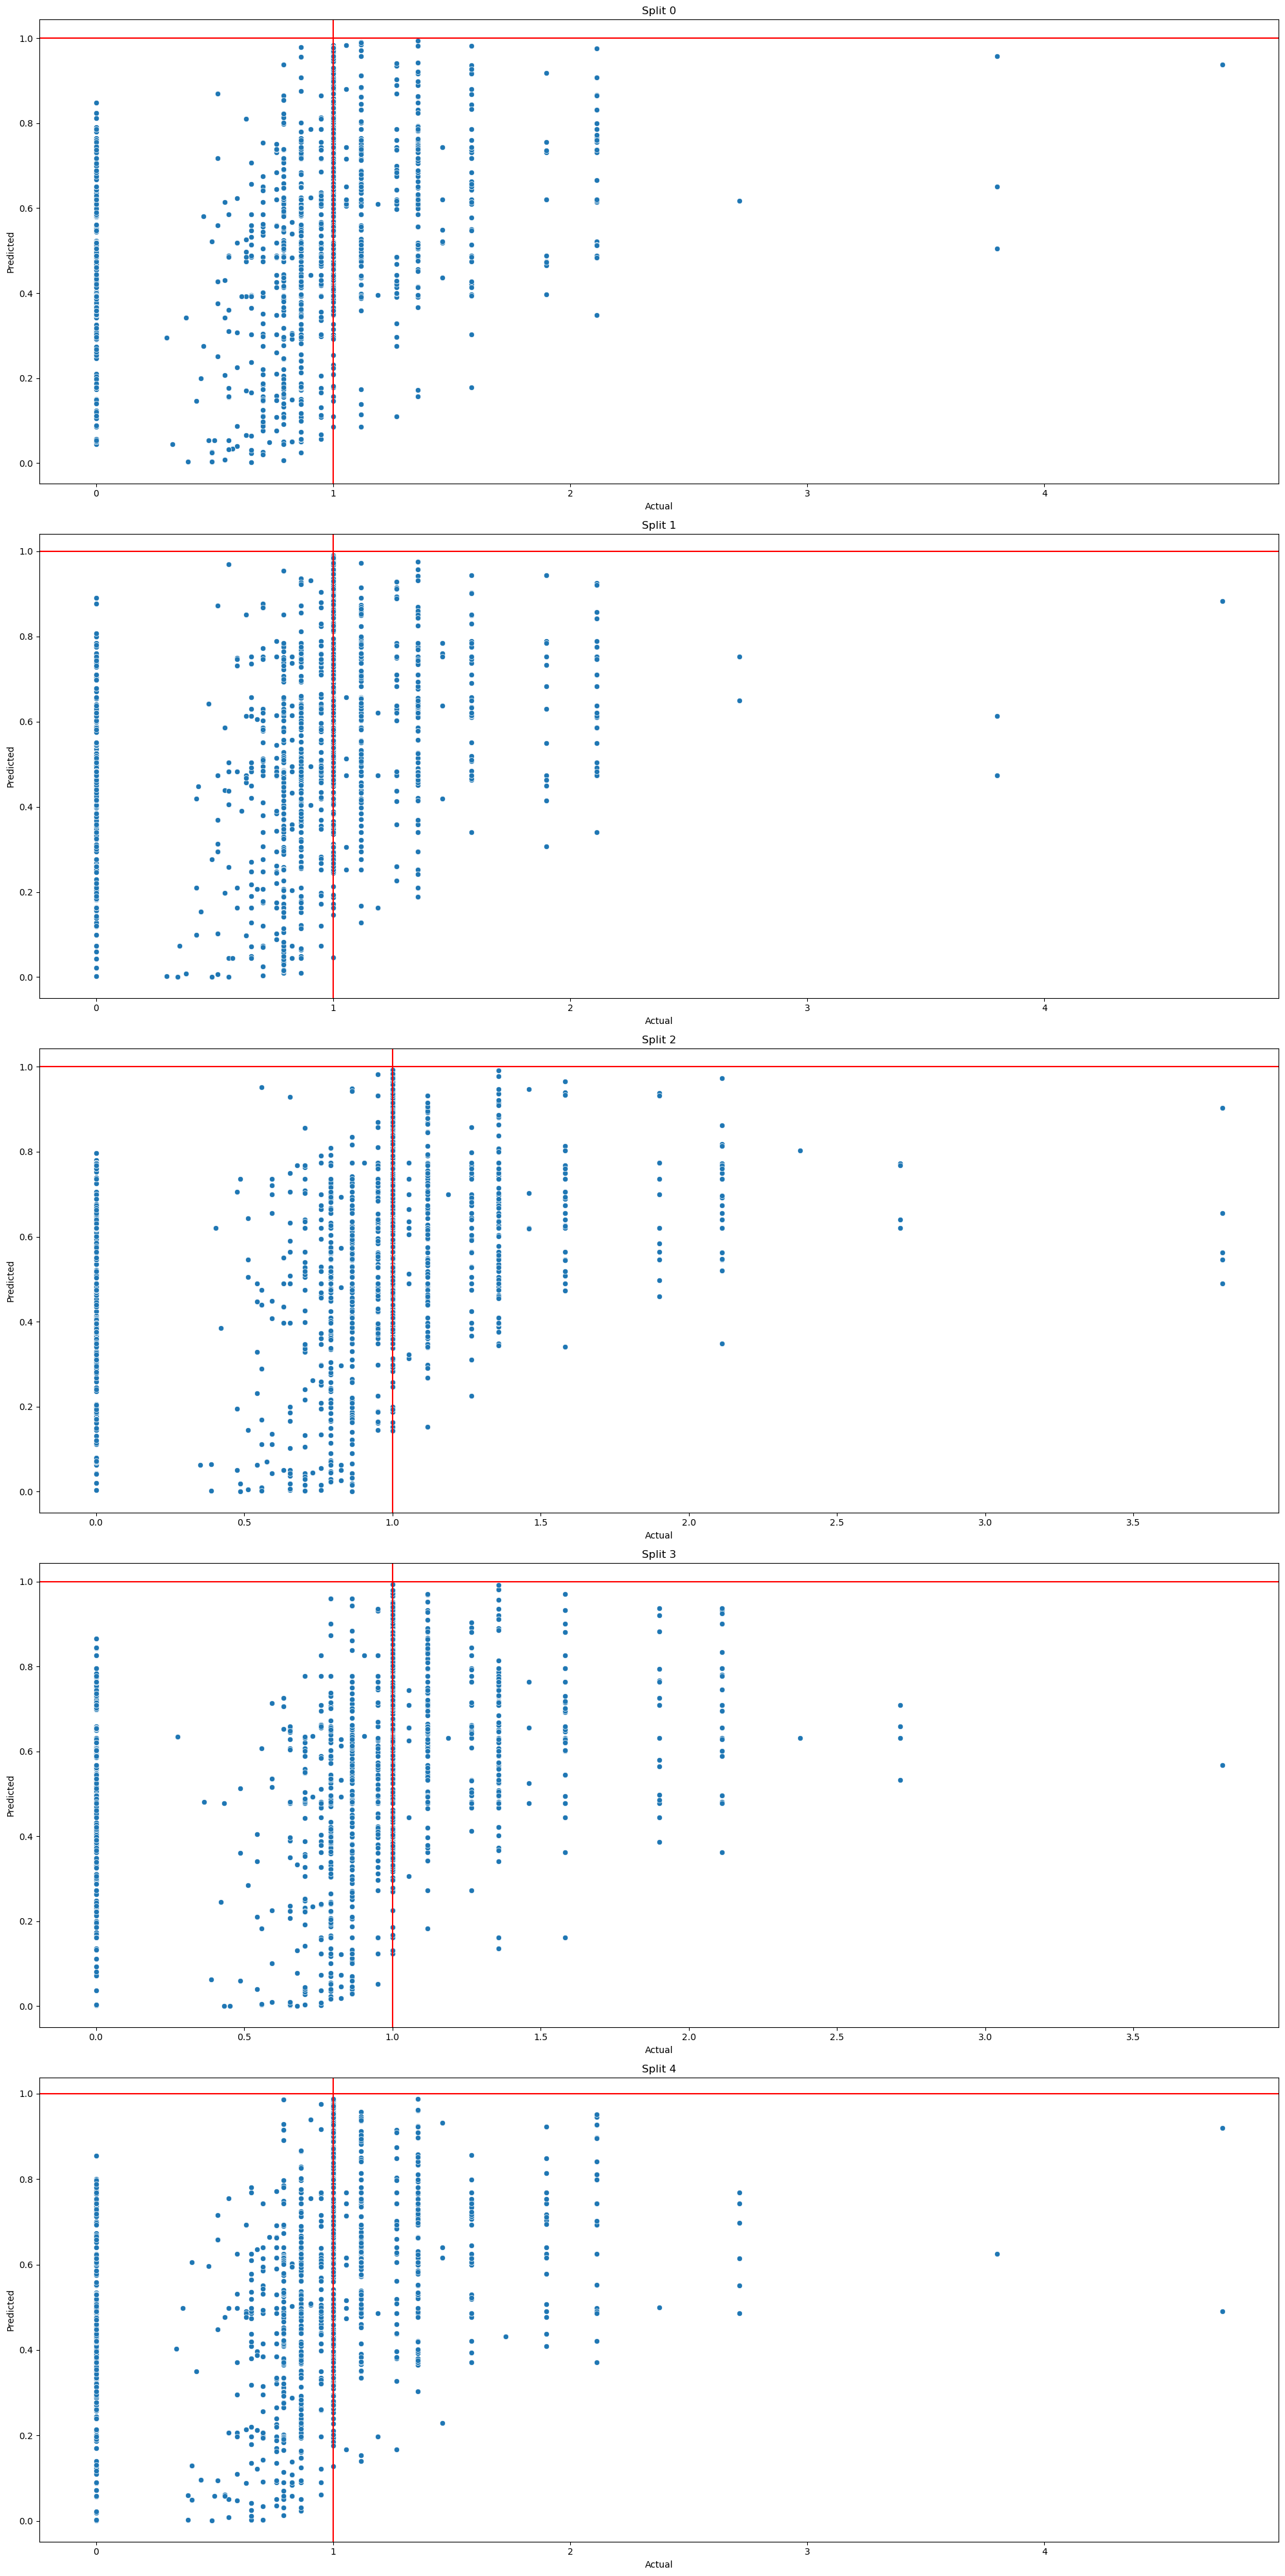

In [ ]:
#make a fig and ax with 5 subplots
fig, ax = plt.subplots(5, 1, figsize=(20, 40))

for i, (X_train, X_test, y_train, y_test) in enumerate(reg_splits):
    y_pred = xgb_reg_models[i].best_estimator_.predict(X_test)
    # Evaluate the custom binary classifier
    # xgb_reg_df.loc[i, 'cv_accuracy'] = xgb_reg_models[i].best_score_
    # xgb_reg_df.loc[i, 'test_accuracy'] = accuracy_score(y_test, y_pred_class)
    # xgb_reg_df.loc[i, 'test_precision'] = precision_score(y_test, y_pred_class)
    # xgb_reg_df.loc[i, 'test_recall'] = recall_score(y_test, y_pred_class)
    # xgb_reg_df.loc[i, 'test_f1'] = f1_score(y_test, y_pred_class)

    #on the i-th subplot, plot the predicted vs actual values. Draw a vertical line at 1.0
    sns.scatterplot(x=y_test, y=y_pred, ax=ax[i])
    ax[i].set_title(f'Split {i}')
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].axvline(1.0, color='r')
    ax[i].axhline(1.0, color='r')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best accuracy for split 0:  45.662%


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best accuracy for split 1:  45.662%


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best accuracy for split 2:  45.662%


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best accuracy for split 3:  45.662%


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
"""
This script performs feature selection and model evaluation using various classifiers with a pipeline approach.

The script includes the following steps:
1. Import necessary libraries and modules.
2. Define the number of features to select using SelectKBest.
3. Create a dictionary of classifiers, each with a pipeline that includes feature selection and the classifier.
4. Perform 5-fold cross-validation for each model.
5. Print the cross-validation results, including mean accuracy and standard deviation for each model.
"""
from sklearn.pipeline import Pipeline

# Define the number of features to select
k = 20


# Update classifiers to include feature selection
classifiers = {
    'log_reg': Pipeline([('select', SelectKBest(f_classif, k=k)), 
                         ('log_reg', LogisticRegression(max_iter=10000, random_state=42))]),

    'svc_linear': Pipeline([('select', SelectKBest(f_classif, k=k)), 
                            ('svc_linear', LinearSVC(dual='auto'))]),

    'lda_poly': Pipeline([('scale', StandardScaler()), 
                          ('poly', PolynomialFeatures(3)), 
                          ('select', SelectKBest(f_classif, k=k)), 
                          ('lda', LinearDiscriminantAnalysis())]),

    'log_reg_poly': Pipeline([('scale', StandardScaler()), 
                              ('poly', PolynomialFeatures(3)), 
                              ('select', SelectKBest(f_classif, k=k)), 
                              ('log_reg', LogisticRegression(penalty=None, max_iter=10000))]),

    'knn': Pipeline([('scale', StandardScaler()), 
                     ('select', SelectKBest(f_classif, k=k)), 
                     ('knn', KNeighborsClassifier())]),

    'svc_rbf': Pipeline([('scale', StandardScaler()), 
                         ('select', SelectKBest(f_classif, k=k)), 
                         ('svc', SVC(kernel='rbf'))]),

    'random_forest': Pipeline([('select', SelectKBest(f_classif, k=k)), 
                               ('random_forest', 
                                RandomForestClassifier(n_estimators=100, random_state=42))])
}

# Perform 5-fold cross-validation for each model
cv_results = {}
for model_name, model in classifiers.items():
    scores = cross_val_score(model, 
                             X_train, 
                             y_train, 
                             cv=10,
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)
    cv_results[model_name] = scores
    # print(f"{model_name}: Mean -logloss = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Print the cross-validation results
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

In [63]:
pd.DataFrame(cv_results)

,log_reg,svc_linear,lda_poly,log_reg_poly,knn,svc_rbf,random_forest
0,0.606178,0.606821,0.608108,0.574003,0.606178,0.640927,0.651223
1,0.605534,0.604247,0.611969,0.619048,0.635779,0.644144,0.652510
2,0.598456,0.602317,0.579151,0.593308,0.631918,0.643501,0.648005
3,0.611075,0.611075,0.623954,0.639408,0.620090,0.663232,0.666452
4,0.591758,0.589182,0.602704,0.607856,0.598841,0.632968,0.631681


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters found:  {'subsample': 1.0, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'lambda': 2, 'gamma': 0.1, 'eval_metric': 'logloss', 'colsample_bytree': 0.6, 'alpha': 0.2}
Best accuracy found:  0.6950339816405495


In [68]:
#get feature importances
xgb_model = xgb.XGBClassifier(**random_search.best_params_)
xgb_model.fit(X_train, y_train)
feature_importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
39,ENT_SEM,0.080025
2,104,0.052350
32,414,0.049158
36,492,0.047351
24,317,0.047292
15,207,0.040902
7,143,0.038455
18,266,0.037844
10,160,0.036755
35,436,0.034215


In [12]:
feature_importances.sum()

NameError: name 'feature_importances' is not defined

In [70]:
#get the confusion matrix
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       887
           1       0.76      0.68      0.72      1055

    accuracy                           0.71      1942
   macro avg       0.71      0.71      0.71      1942
weighted avg       0.71      0.71      0.71      1942



In [34]:
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [100],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(data=X_train[courses], label=y_train)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_grid, 
                                   n_iter=500, 
                                   scoring='accuracy', 
                                   verbose=1, 
                                   n_jobs=-1)
random_search.fit(X_train[courses], y_train)


# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters found:  {'subsample': 1.0, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'lambda': 1.5, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.6, 'alpha': 0.1}
Best accuracy found:  0.639114172461572


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [35]:
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [100],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(data=X_train[course_SEM], label=y_train)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_grid, 
                                   n_iter=500, 
                                   scoring='accuracy', 
                                   verbose=1, 
                                   n_jobs=-1)
random_search.fit(X_train[course_SEM], y_train)


# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters found:  {'subsample': 0.8, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'lambda': 2, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 1.0, 'alpha': 0.2}
Best accuracy found:  0.6444248344069906
